<a href="https://colab.research.google.com/github/pebut/Hakaton/blob/main/PandemicHakaton_track3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Теоретический материал:* https://youtu.be/J-lunIrxy1U

# Импорт Библиотек

*Разбор данного раздела:* https://youtu.be/h8cOCvlYmN8?t=18

In [71]:
import numpy as np #Библиотека работы с массивами
import pandas as pd # Библиотека для работы с базами
import math

from tensorflow.keras.models import Sequential, Model # 
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten #
from tensorflow.keras import utils #Используем для to_categoricall
from tensorflow.keras.optimizers import Adam,Adadelta,SGD,Adagrad,RMSprop #
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence #
from tensorflow.keras.preprocessing.sequence import pad_sequences #
from tensorflow.keras.callbacks import LambdaCallback # подключаем колбэки

from sklearn.preprocessing import StandardScaler # 
from sklearn.model_selection import train_test_split # Для разбивки на выборки
from sklearn.metrics import mean_squared_error, mean_absolute_error #
#from google.colab import files #Для загрузки своей картинки

import random #Для генерации случайных чисел 
import math # Для округления
#import os #Для работы с файлами 
import re #
import matplotlib.pyplot as plt #
%matplotlib inline

from IPython.display import clear_output


In [ ]:
from google.colab import drive # Подключаем диск
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AE3K4tlvKERuBIWVfXr8LlxeTU9ahErbGWAygYyJ79bjEkQdfJuJP4
Mounted at /content/drive


Осторожно! Запуск всех разделов сразу, может привести к недостатку памяти и сессия перезапустится.

# Оценка зарплаты на базе HeadHunter

##Загружаем базу и смотрим содержание

*Разбор данного раздела:* https://youtu.be/h8cOCvlYmN8?t=55

In [21]:
fixed_df = pd.read_csv('/content/drive/My Drive/Базы/hh_fixed.csv')# Это то, куда вы скачали файл

FileNotFoundError: ignored

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

fixed_df = pd.read_csv('/content/drive/MyDrive/Hakaton/train.csv', sep=';',encoding='utf8')
test = pd.read_csv('/content/drive/MyDrive/Hakaton/test.csv', sep=';',encoding='utf8')


In [183]:
pos = pd.read_csv('/content/drive/MyDrive/Hakaton/unique_pos.txt', sep=',',encoding='utf8')

In [184]:
pos.shape

(0, 63694)

In [153]:
# Количество резюме и критерии
print(fixed_df.shape)

(306270, 25)


In [169]:
fixed_df.head(10)

,id,position,region,industry,locality,locality_name,education_type,drive_licences,citizenship,schedule,employement_type,age,gender,experience,salary_desired,relocation_ready,travel_ready,retraining_ready,is_worldskills_participant,has_qualifications,completeness_rate,creation_date,modification_date,publish_date,salary
0,0,Специалист,Тульская область,"Государственная служба, некоммерческие организ...",7100000100000,Тула,Незаконченное высшее,[B],Российская Федерация,Полный рабочий день,Полная занятость,21.0,Мужской,3,35000,False,False,True,NaN,NaN,64.0,2020-05-07,2020-05-08,2020-05-07,37500
1,1,Лаборант,Алтайский край,"Государственная служба, некоммерческие организ...",2200000100000,Барнаул,Высшее,[B],Российская Федерация,Полный рабочий день,Полная занятость,26.0,Женский,4,15000,False,True,True,NaN,NaN,88.0,2020-10-21,2020-10-27,2020-10-27,14000
2,3,"Специалист, администратор, бухгалтер, экономист",Ульяновская область,"Административная работа, секретариат, АХО",7300000200000,Димитровград,Высшее,[B],Российская Федерация,Полный рабочий день,Полная занятость,36.0,Женский,12,20000,False,NaN,True,NaN,NaN,78.0,2019-04-25,2020-02-04,2020-02-04,24600
3,4,Специалист,Свердловская область,"Государственная служба, некоммерческие организ...",6600002300000,Нижний Тагил,Высшее,[B],Российская Федерация,Полный рабочий день,Полная занятость,34.0,Женский,9,30000,False,False,False,NaN,NaN,91.0,2020-09-19,2020-09-20,2020-09-19,16075
4,5,Инструктор по плаванию,Иркутская область,"Здравоохранение, спорт, красота, социальное об...",3800000400000,Ангарск,NaN,NaN,Российская Федерация,Полный рабочий день,Полная занятость,25.0,Мужской,1,40000,False,NaN,NaN,NaN,NaN,58.0,2020-04-20,2020-09-09,2020-04-21,22080
5,8,учитель технологии,Тюменская область,"Образование, наука",7200000000000,Тюменская,NaN,NaN,Российская Федерация,Полный рабочий день,Полная занятость,49.0,Женский,0,31140,False,True,True,NaN,NaN,57.0,2019-08-09,2019-08-09,2019-08-09,31140
6,9,контролер отк,Республика Татарстан,"Строительство, ремонт, стройматериалы, недвижи...",1600000000000,Татарстан,Среднее профессиональное,NaN,Российская Федерация,Полный рабочий день,Полная занятость,NaN,NaN,17,20000,False,True,True,NaN,NaN,62.0,2020-07-23,2020-10-22,2020-08-01,27600
7,10,"Юрист, Юриспруденция, ФССП, Федеральная Служба...",Республика Саха (Якутия),"Государственная служба, некоммерческие организ...",1400000100000,Якутск,Высшее,NaN,Российская Федерация,Полный рабочий день,Полная занятость,25.0,Мужской,1,30000,False,True,True,NaN,NaN,88.0,2020-05-26,2020-05-27,2020-05-27,33120
8,12,Кондитер,Забайкальский край,Пищевая промышленность,7500000100000,Чита,Среднее профессиональное,NaN,Российская Федерация,Полный рабочий день,Полная занятость,28.0,Мужской,2,30000,False,NaN,True,NaN,NaN,63.0,2020-04-25,2020-07-27,2020-04-25,22500
9,13,Бурильщик ЭРБС,Пермский край,Добывающая промышленность,5900000000000,Пермский,NaN,NaN,Российская Федерация,"Полный рабочий день,Вахтовый метод",Полная занятость,32.0,Мужской,0,60000,False,True,True,NaN,NaN,52.0,2020-04-17,2020-07-10,2020-04-20,139104


In [155]:
fixed_df.head()

,id,position,region,industry,locality,locality_name,education_type,drive_licences,citizenship,schedule,employement_type,age,gender,experience,salary_desired,relocation_ready,travel_ready,retraining_ready,is_worldskills_participant,has_qualifications,completeness_rate,creation_date,modification_date,publish_date,salary
0,0,Специалист,Тульская область,"Государственная служба, некоммерческие организ...",7100000100000,Тула,Незаконченное высшее,[B],Российская Федерация,Полный рабочий день,Полная занятость,21.0,Мужской,3,35000,False,False,True,NaN,NaN,64.0,2020-05-07,2020-05-08,2020-05-07,37500
1,1,Лаборант,Алтайский край,"Государственная служба, некоммерческие организ...",2200000100000,Барнаул,Высшее,[B],Российская Федерация,Полный рабочий день,Полная занятость,26.0,Женский,4,15000,False,True,True,NaN,NaN,88.0,2020-10-21,2020-10-27,2020-10-27,14000
2,3,"Специалист, администратор, бухгалтер, экономист",Ульяновская область,"Административная работа, секретариат, АХО",7300000200000,Димитровград,Высшее,[B],Российская Федерация,Полный рабочий день,Полная занятость,36.0,Женский,12,20000,False,NaN,True,NaN,NaN,78.0,2019-04-25,2020-02-04,2020-02-04,24600
3,4,Специалист,Свердловская область,"Государственная служба, некоммерческие организ...",6600002300000,Нижний Тагил,Высшее,[B],Российская Федерация,Полный рабочий день,Полная занятость,34.0,Женский,9,30000,False,False,False,NaN,NaN,91.0,2020-09-19,2020-09-20,2020-09-19,16075
4,5,Инструктор по плаванию,Иркутская область,"Здравоохранение, спорт, красота, социальное об...",3800000400000,Ангарск,NaN,NaN,Российская Федерация,Полный рабочий день,Полная занятость,25.0,Мужской,1,40000,False,NaN,NaN,NaN,NaN,58.0,2020-04-20,2020-09-09,2020-04-21,22080


In [131]:
# Пример данных
n = 0 # Берем первое резюме
for i in range(len(fixed_df.values[n])): # Выводим значение каждой графы резюме
  print(i, " ", fixed_df.values[n][i])

0   0
1   Специалист
2   Тульская область
3   Государственная служба, некоммерческие организации
4   7100000100000
5   Тула
6   Незаконченное высшее
7   [B]
8   Российская Федерация
9   Полный рабочий день
10   Полная занятость
11   21.0
12   Мужской
13   3
14   35000
15   False
16   False
17   True
18   nan
19   nan
20   64.0
21   2020-05-07
22   2020-05-08
23   2020-05-07
24   37500


## Парсим базу

*Разбор данного раздела:* https://youtu.be/h8cOCvlYmN8?t=183





In [11]:
##############################################
####Убрать кодировку в описаниях \xa0 \n
##############################################
fixed_df = fixed_df.drop(fixed_df.columns[0],axis = 1) # Убираем первый столбец с продублированными индексами. Он нам не нужен

i=0
for j in range(24):  # Для каждого из столбцов таблицы
    for i in range(fixed_df.shape[0]): # По всем резюме
        if type(fixed_df.values[i][j])!=float: # если данные текстовые, то заменяем фрагменты кодировки ASCII на отсутствие символов
            fixed_df.values[i][j] = fixed_df.values[i][j].replace("\xa0","")
            fixed_df.values[i][j] = fixed_df.values[i][j].replace("\n"," ")

KeyboardInterrupt: ignored

In [157]:
fixed_df = fixed_df.drop(fixed_df[fixed_df.salary<10].index, axis=0 )
fixed_df.shape

(303851, 25)

In [174]:
#! Boolean тип кодирования с учетом NaN
def getParameterBool(arg):
  out = [0,0]
  if arg =='True':
    out = [1,0]
  elif arg=='False':
    out = [0,1]
  return out

#! Данные о поле gender
def getParameterSex(arg):
  out = [0,0]
  #Если М, то 1. По умолчанию 0 - Ж
  if arg=='Мужской':
    out = [1,0]
  elif arg=='Женский':
    out = [0,1]
  return out

#! Полученный возраст превращаем в класс возрастной категории
def getParameterAgeVect(arg):
  if arg > 14 and arg < 80:
    arg=arg
  else: arg = 0
  outClass =int((arg-13)/5)
  outClass = max(0, min(10,outClass))
  
  # На выходе получаем вектор с нужной категорией возраста
  return list(utils.to_categorical(outClass, 11).astype('int'))

#! Получаем параметер водительских прав
def getParameterdriveLicence(arg):
  out = [0, 0, 0, 0, 0, 0]
  if arg ==arg:
    if ("A" in arg):    out[0]=1
    if ("B" in arg):      out[1]=1
    if ("C" in arg):   out[2]=1
    if ("D" in arg): out[3]=1
    if ("E" in arg): out[4]=1
    if ("А" in arg):    out[0]=1
    if ("В" in arg):      out[1]=1
    if ("С" in arg):   out[2]=1
    if ("Е" in arg): out[4]=1
  return out



# Зарплата
def getParameterSalary(arg):
    num = arg
    # Сначала получаем чистое число, убираем лишние знаки
    if (type(num) == str):
        num = re.sub(' ','',num)
        num = re.sub('[а-яА-ЯёЁ]','',num)
        num = re.sub('[a-zA-Z]','',num)
        num = num.replace('.','')
        
        # Получаем чисто валюту, убираем цифры
        curr = re.sub('[0-9]','',arg)
        curr = curr.replace('.','').strip()
        
        # Конвертируем в рубли, если валюта
        if curr == 'USD':
           num = float(num)*65
        elif curr == 'KZT':
           num = float(num)*0.17
        elif curr=='грн':
           num = float(num)*2.6
        elif curr=='белруб':
           num = float(num)*30.5
        elif curr=='EUR':
           num = float(num)*70
        elif curr=='KGS':
           num = float(num)*0.9
        elif curr=='сум':
           num = float(num)*0.007
        elif curr=='AZN':
           num = float(num)*37.5
             
    salaryStr = int(num) 

    
    return salaryStr


# Данные о городе
def getParameterCity(arg):
  millionCities = "Новосибирск Екатеринбург Нижний Новгород Казань Челябинск Омск Самара Ростов-на-Дону Уфа Красноярск Пермь Воронеж Волгоград"
  sarg=arg.split(',')
  for item in sarg:
    item= item.strip()
    if item == "Москва":          return [1, 0, 0, 0]
    if item == "Санкт-Петербург": return [0, 1, 0, 0]
    if item in millionCities:     return [0, 0, 1, 0]
  return [0, 0, 0, 1]

#! Данные о желаемой занятости
def getParameterEmployment(arg):
  out= [0, 0, 0, 0, 0, 0]
  if ('Полная занятость' in arg):           out[0]=1
  if ('Частичная занятость' in arg):  out[1]=1
  if ('Удаленная' in arg):     out[2]=1
  if ('Сезонная' in arg):     out[3]=1
  if ('Временная' in arg):     out[4]=1
  if ('Стажировка' in arg):     out[5]=1
  return out
  



#! Данные о желаемом графике работы
def getParameterSchedule(arg):
  out = [0, 0, 0, 0, 0, 0]
  if ("Полный рабочий день" in arg):    out[0]=1
  if ("Ненормированный рабочий день" in arg):      out[1]=1
  if ("Неполный рабочий день" in arg):   out[2]=1
  if ("Сменный график" in arg): out[3]=1
  if ("Гибкий график" in arg): out[4]=1
  if ("Вахтовый метод" in arg): out[5]=1
  return out


#! Данные об образовании
def getParameterEducation(arg):
  out = [0, 0, 0, 0] #По умолчанию не указано
  if arg == "Высшее":  out[0] = 1
  if arg == "Незаконченное высшее":      out[1] = 1
  if arg == "Среднее профессиональное":      out[2] = 1
  if arg == "Среднее":      out[3] = 1
  return out


List = ['Государственная служба, некоммерческие организации',
       'Административная работа, секретариат, АХО',
       'Здравоохранение, спорт, красота, социальное обеспечение',
       'Образование, наука',
       'Строительство, ремонт, стройматериалы, недвижимость',
       'Пищевая промышленность', 'Добывающая промышленность',
       'Производство', 'Туризм, гостиницы, рестораны',
       'Работы, не требующие квалификации', 'Юриспруденция',
       'Финансы, кредит, страхование, пенсионное обеспечение',
       'Продажи, закупки, снабжение, торговля',
       'Информационные технологии, телекоммуникации, связь',
       'Транспорт, автобизнес, логистика, склад, ВЭД',
       'Безопасность, службы охраны', 'ЖКХ, эксплуатация',
       'Электроэнергетика', 'Маркетинг, реклама, PR',
       'Рабочие специальности',
       'Химическая, нефтехимическая, топливная промышленность',
       'Высший менеджмент', 'Легкая промышленность',
       'Услуги населению, сервисное обслуживание', 'Машиностроение',
       'Сельское хозяйство, экология, ветеринария',
       'Кадровая служба, управление персоналом',
       'Искусство, культура и развлечения',
       'Лесная, деревообрабатывающая, целлюлозно-бумажная промышленность',
       'Металлургия, металлообработка', 'Домашний персонал',
       'Консалтинг, стратегическое развитие, управление',
       'Начал трудовую деятельность']

#! Данные о индустрии
def getParameterIndustry(arg):
  out=[]
  for i in range(len(List)):
   out.append(0)
  out[List.index(arg)] = 1
  return out

#! Данные о гражданстве
def getParameterCitizenship(arg):
   out=[0,0]
   if arg =='Российская Федерация': out = [1,0]
   else: out = [0,1]
   return out


List_reg = ['Алтайский край', 'Свердловская область', 'Ульяновская область',
       'Краснодарский край', 'Московская область',
       'Нижегородская область', 'Республика Бурятия',
       'Калининградская область', 'Омская область', 'Ростовская область',
       'Красноярский край', 'Ямало-Ненецкий автономный округ',
       'Республика Татарстан', 'Пензенская область', 'Самарская область',
       'Тульская область', 'Республика Хакасия', 'Костромская область',
       'Тюменская область', 'г. Москва', 'Белгородская область',
       'Пермский край', 'Новгородская область',
       'Ханты-Мансийский автономный округ - Югра',
       'Волгоградская область', 'Иркутская область', 'Курская область',
       'Псковская область', 'Приморский край', 'Курганская область',
       'Забайкальский край', 'г. Санкт-Петербург', 'Камчатский край',
       'Новосибирская область', 'Оренбургская область',
       'Челябинская область', 'Ярославская область', 'Томская область',
       'Орловская область', 'Чеченская Республика', 'Республика Алтай',
       'Республика Дагестан', 'Республика Коми',
       'Республика Саха (Якутия)', 'Республика Крым',
       'Республика Марий Эл', 'Рязанская область', 'Ивановская область',
       'Калужская область', 'Республика Башкортостан',
       'Воронежская область', 'Ставропольский край',
       'Кемеровская область', 'Вологодская область', 'Хабаровский край',
       'Саратовская область', 'Мурманская область',
       'Ленинградская область', 'Астраханская область',
       'Владимирская область', 'Амурская область', 'Тверская область',
       'Архангельская область', 'Магаданская область',
       'Чувашская Республика', 'Липецкая область',
       'Республика Северная Осетия-Алания', 'Удмуртская Республика',
       'Смоленская область', 'Брянская область', 'Республика Калмыкия',
       'г. Севастополь', 'Республика Карачаево-Черкесия',
       'Республика Кабардино-Балкария', 'Республика Адыгея',
       'Республика Мордовия', 'Республика Ингушетия',
       'Республика Карелия', 'Республика Тыва', 'Кировская область',
       'Тамбовская область', 'Сахалинская область',
       'Чукотский автономный округ', 'Еврейская автономная область',
       'Ненецкий автономный округ', 'г. Байконур']

#! Данные о регионе
def getParameterRegion(arg):
  out = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  #for i in range(len(List_reg)-1):
  # out.append(0)
  if arg==arg:
    out[List_reg.index(arg)] = 1
   
  return out     


# Данные об опыте работы
def getParameterExperience(arg):
  arg = str(arg)
  #Проверяем, если не пустая строка
  symbols = 0
  years = 0
  months = 0
  for s in arg:
    if (s != " "):
      symbols += 1
  
  #Находим индексы пробелов около фразы "опыт работы"
  if (symbols > 10):
      spacesIndexes = []
      index = 0
      while ((len(spacesIndexes) < 5) & (index < len(arg))):
          if (arg[index] == " "):
              spacesIndexes.append(index)
          index += 1

      years = 0
      months = 0
      if (arg[spacesIndexes[2]+1] != "м"):
         if (len(spacesIndexes) >= 3):
            yearsStr = arg[spacesIndexes[1]:spacesIndexes[2]] # Записываем в строку значение лет
            years = int(yearsStr)
      
         if (len(spacesIndexes) >= 5):
            monthsStr = arg[spacesIndexes[3]:spacesIndexes[4]] # Записываем в строку значение месяцев
            if(arg[spacesIndexes[2]+1] == "м"):
                months = int(monthsStr)
      else:
        if (len(spacesIndexes) >= 3):
          monthsStr = arg[spacesIndexes[1]:spacesIndexes[2]]
          months = int(monthsStr)
      
  return 12*years+months

#! Категориальное представление опыта работы
def getParameterExperienceVector(arg):
  out = getParameterExperience(arg)*12
  outClass = 0
  if (out > 6): # если больше 6 месяцев
    outClass = 1
  if (out > 12): # если больше 12 месяцев
    outClass = 2
  if (out > 24): # если больше 24 месяцев
    outClass = 3
  if (out > 36): # если больше 36 месяцев
    outClass = 4
  if (out > 60): # если больше 60 месяцев
    outClass = 5
  if (out > 96): # если больше 96 месяцев
    outClass = 6
  if (out > 120): # если больше 120 месяцев
    outClass = 7
  if (out > 156): # если больше 156 месяцев
    outClass = 8
  if (out > 192): # если больше 192 месяцев
    outClass = 9 
  if (out > 240): # если больше 240 месяцев
    outClass = 10
  
  return list(utils.to_categorical(outClass, 11).astype('int'))





In [171]:
def getAllParameters(val):
# position = getParameterPosition(val[1])
  region = getParameterRegion(val[2])
  industry = getParameterIndustry(val[3])
# locality_name =getParameterLocality(val[5])
  education_type = getParameterEducation(val[6])
  drive_licences = getParameterdriveLicence(val[7])
  citizenship = getParameterCitizenship([val[8]])
  schedule = getParameterSchedule(val[9])
  employement_type = getParameterEmployment(val[10])
  age = getParameterAgeVect(val[11])
  gender = getParameterSex(val[12])
  experience = getParameterExperienceVector(val[13])
  relocation_ready = getParameterBool(val[15])
  travel_ready = getParameterBool(val[16])
  retraining_ready = getParameterBool(val[17])
  is_worldskills_participant = getParameterBool(val[18])
  has_qualifications = getParameterBool(val[19])
  #completeness_rate	=val[20]
  
  out = []
# out.append(position)
  out +=(region)
  out += industry
# out += locality_name
  out +=education_type
  out +=drive_licences
  out +=citizenship
  out +=schedule
  out +=employement_type
  out +=age
  out +=gender
  out +=experience
  out +=relocation_ready
  out +=travel_ready
  out +=retraining_ready
  out +=is_worldskills_participant
  out +=has_qualifications
  #out +=completeness_rate

  return out
 

In [175]:
# Создаем тренировочную выборку
def get01Data(values):
  xTrain = []
  yTrain = []
  
  # Предсказывать будем зарплату
  for val in values:
    y = getParameterSalary(val[24])
    
    # Все, что не зарплата - обучающая выборка
    if (y != -1):
      x = getAllParameters(val)
      xTrain.append(x)
      yTrain.append(y/1000)
  
  xTrain = np.array(xTrain)
  yTrain = np.array(yTrain)

  
  return (xTrain, yTrain)

In [176]:
(xTrain01, yTrain) = get01Data(fixed_df.values) # Извлекаем значения загруженного набора данных

In [160]:
# Размер набора параметров и зарплат
print(xTrain01.shape) 
print(yTrain.shape)
# Пример обработанных данных
n = 30000 
print(xTrain01[n])
print(yTrain[n])

(303851, 171)
(303851,)
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
39.55


## Нейронка по простым данным

*Разбор данного раздела:* https://youtu.be/h8cOCvlYmN8?t=964

Epoch 1/50
517/517 - 2s - loss: 2323.1167 - mae: 32.8720 - val_loss: 1776.6302 - val_mae: 23.9823
Epoch 2/50
517/517 - 1s - loss: 1295.6831 - mae: 19.9870 - val_loss: 1202.1534 - val_mae: 20.1455
Epoch 3/50
517/517 - 1s - loss: 1111.3123 - mae: 19.8383 - val_loss: 1143.0369 - val_mae: 19.9228
Epoch 4/50
517/517 - 1s - loss: 1062.3635 - mae: 19.3307 - val_loss: 1099.6061 - val_mae: 19.3521
Epoch 5/50
517/517 - 2s - loss: 1022.3926 - mae: 18.7970 - val_loss: 1063.9634 - val_mae: 18.8527
Epoch 6/50
517/517 - 2s - loss: 992.2172 - mae: 18.3503 - val_loss: 1036.1083 - val_mae: 18.4463
Epoch 7/50
517/517 - 1s - loss: 970.1899 - mae: 18.0503 - val_loss: 1017.0327 - val_mae: 18.1904
Epoch 8/50
517/517 - 1s - loss: 955.3902 - mae: 17.8439 - val_loss: 1004.3529 - val_mae: 17.8832
Epoch 9/50
517/517 - 1s - loss: 946.4824 - mae: 17.6923 - val_loss: 997.2122 - val_mae: 17.8630
Epoch 10/50
517/517 - 1s - loss: 940.5115 - mae: 17.5935 - val_loss: 991.5667 - val_mae: 17.6281
Epoch 11/50
517/517 - 1s -

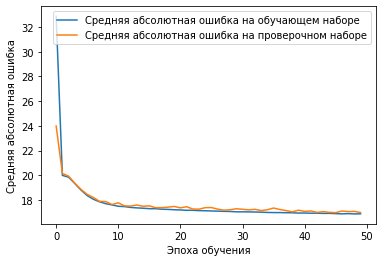

In [177]:
# Обучаем модель полученными данными
model = Sequential()
model.add(BatchNormalization(input_shape=(xTrain01.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1000, activation='tanh'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(lr=1e-5), loss='mse', metrics=['mae'])

history = model.fit(xTrain01, 
                    yTrain, 
                    epochs=50, 
                    batch_size=500,
                    validation_split=0.15, 
                    verbose=2)

plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [162]:
# Делаем предсказание и приводим его к начальному виду
pred = model.predict(xTrain01)
pred = pred.flatten()
# Среднее значение ошибки 
delta = pred - yTrain
absDelta = abs(delta)
print(sum(absDelta) / len(absDelta))

16.931615848991438


In [179]:
# В качестве нормализации данных используем готовую библиотеку 
yScaler = StandardScaler()

# Скармливаем объекту двумерный вектор
yScaler.fit(yTrain.reshape(-1, 1))

# Нормализуем по нормальному распределению
yTrainScaled = yScaler.transform(yTrain.reshape(-1, 1))

print(yTrainScaled.shape)
print(yTrain[1])
print(yTrainScaled[1])

(303851, 1)
14.0
[-0.77223925]


In [164]:
print(min(yTrain), max(yTrain))
print(min(yTrainScaled), max(yTrainScaled))

0.026 2283.641
[-1.16799849] [63.50652087]


Epoch 1/50
173/173 - 1s - loss: 0.9858 - mae: 0.6296 - val_loss: 0.9481 - val_mae: 0.5627
Epoch 2/50
173/173 - 1s - loss: 0.8451 - mae: 0.5453 - val_loss: 0.8699 - val_mae: 0.5305
Epoch 3/50
173/173 - 1s - loss: 0.8016 - mae: 0.5240 - val_loss: 0.8343 - val_mae: 0.5131
Epoch 4/50
173/173 - 1s - loss: 0.7806 - mae: 0.5129 - val_loss: 0.8185 - val_mae: 0.5109
Epoch 5/50
173/173 - 1s - loss: 0.7679 - mae: 0.5059 - val_loss: 0.8090 - val_mae: 0.5062
Epoch 6/50
173/173 - 1s - loss: 0.7597 - mae: 0.5013 - val_loss: 0.8023 - val_mae: 0.5027
Epoch 7/50
173/173 - 1s - loss: 0.7536 - mae: 0.4977 - val_loss: 0.7973 - val_mae: 0.4972
Epoch 8/50
173/173 - 1s - loss: 0.7488 - mae: 0.4951 - val_loss: 0.7936 - val_mae: 0.4944
Epoch 9/50
173/173 - 1s - loss: 0.7450 - mae: 0.4930 - val_loss: 0.7908 - val_mae: 0.4893
Epoch 10/50
173/173 - 1s - loss: 0.7414 - mae: 0.4904 - val_loss: 0.7877 - val_mae: 0.4948
Epoch 11/50
173/173 - 1s - loss: 0.7385 - mae: 0.4890 - val_loss: 0.7853 - val_mae: 0.4911
Epoch 12

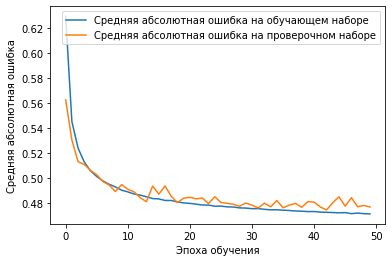

In [178]:
# Обучаем модель стандартизированными данными
modelS = Sequential()
modelS.add(BatchNormalization(input_shape=(xTrain01.shape[1],)))
modelS.add(Dense(128, activation='relu'))
modelS.add(Dense(1000, activation='tanh'))
modelS.add(Dense(100, activation='relu'))
modelS.add(Dense(1, activation='linear'))

modelS.compile(optimizer=Adam(lr=1e-5), loss='mse', metrics=['mae'])

history = modelS.fit(xTrain01, 
                    yTrainScaled, 
                    epochs=50, 
                    batch_size=1500,
                    validation_split=0.15, 
                    verbose=2)

plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [180]:
# Делаем предсказание и приводим его к начальному виду
pred = modelS.predict(xTrain01)
predUnscaled = yScaler.inverse_transform(pred).flatten()

# Среднее значение ошибки 
delta = predUnscaled - yTrain
absDelta = abs(delta)
print(sum(absDelta) / len(absDelta))

16.618643034961945


## Оценка результатов

*Разбор данного раздела:* https://youtu.be/h8cOCvlYmN8?t=1314



In [181]:
yy = model.predict(xTrain01) # Результат для всего тренировочного набора

In [182]:
n = 10
for i in range(n):
  print('Реальное значение - ',yTrain[i], " Предсказанное значение - ", yy[i][0], " Разница - ", abs(yTrain[i]-yy[i][0]))

Реальное значение -  37.5  Предсказанное значение -  39.3924  Разница -  1.8923988342285156
Реальное значение -  14.0  Предсказанное значение -  33.939663  Разница -  19.93966293334961
Реальное значение -  24.6  Предсказанное значение -  30.290564  Разница -  5.690563583374022
Реальное значение -  16.075  Предсказанное значение -  35.841686  Разница -  19.766686248779298
Реальное значение -  22.08  Предсказанное значение -  45.813236  Разница -  23.733236236572267
Реальное значение -  31.14  Предсказанное значение -  30.56076  Разница -  0.5792395019531256
Реальное значение -  27.6  Предсказанное значение -  37.081024  Разница -  9.481024169921874
Реальное значение -  33.12  Предсказанное значение -  62.625874  Разница -  29.50587356567383
Реальное значение -  22.5  Предсказанное значение -  38.527752  Разница -  16.027751922607422
Реальное значение -  139.104  Предсказанное значение -  84.289894  Разница -  54.81410589599611


##Используем простые текстовые данные

*Разбор данного раздела:* https://youtu.be/h8cOCvlYmN8?t=1361

In [ ]:
# Выкачиваем данные по профессиям
def getXTrainTProf(values):
  xTrainTProf = []
  
  for val in values:
    currText = ""
    if (type(val[2]) != float):
      currText += val[2]
    if (type(val[7]) != float):
      currText += " " + val[7]
    
    if (getParameterSalary(val[1]) != -1): # Проверяем, если есть данные о зарплате
      xTrainTProf.append(currText)
  
  xTrainTProf = np.array(xTrainTProf)
  
  return xTrainTProf

In [ ]:
# Вытаскиваем професии для выборки
xTrainTProf = getXTrainTProf(fixed_df.values) 
print(xTrainTProf[123]) # пример профессии 11го резюме

Аналитик Комсомольская правда, ИД


In [ ]:
#################
#Преобразовываем текстовые данные в числовые/векторные для обучения нейросетью
#################

maxWordsCount = 10000 #определяем макс.кол-во слов/индексов, учитываемое при обучении текстов

#для этого воспользуемся встроенной в Keras функцией Tokenizer для разбиения текста и превращения в матрицу числовых значений
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
#выше задаем параметры:
#(num_words=maxWordsCount) - определяем макс.кол-во слов/индексов, учитываемое при обучении текстов
#(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n') - избавляемся от ненужных символов
#(lower=True) - приводим слова к нижнему регистру
#(split=' ') - разделяем слова по пробелу
#(char_level=False) - просим токенайзер не удалять однобуквенные слова

tokenizer.fit_on_texts(xTrainTProf) # "скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности
items = list(tokenizer.word_index.items())  #Вытаскиваем индексы слов для просмотра

In [ ]:
#преобразовываем текст в последовательность индексов согласно частотному словарю
xTrainProfIndexes = tokenizer.texts_to_sequences(xTrainTProf) #обучающие тесты в индексы

## Создание обучающей и проверочной выборки

*Разбор данного раздела:* https://youtu.be/h8cOCvlYmN8?t=1451


In [ ]:
# Преобразовываем полученные выборки из последовательности индексов в матрицы нулей и единиц по принципу Bag of Words
xTrainProf01 = tokenizer.sequences_to_matrix(xTrainProfIndexes) # Подаем xTrain в виде списка чтобы метод успешно сработал
print(xTrainProf01.shape)                                       # Размер обучающей выборки, сформированной по Bag of Words
print(xTrainProf01[0][0:100])        

(62967, 10000)
[0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
n = 0
print(xTrainTProf[n])       # Профессия
print(xTrainProfIndexes[n]) # Профессия через индексы

Специалист по поддержке чата(support team) домашний агент ООО "Гольфстрим"
[4, 5, 219, 2300, 402, 139, 2976, 2006, 2, 1613]


In [ ]:
xTrainProf01.shape

(62967, 10000)

##Обучаем нейронку на простых текстовых данных

*Разбор данного раздела:* https://youtu.be/h8cOCvlYmN8?t=1518

Epoch 1/50
2500/2500 [==============================] - 6s 2ms/step - loss: 20479.1699 - mae: 53.6012 - val_loss: 4592.8647 - val_mae: 40.8919
Epoch 2/50
2500/2500 [==============================] - 5s 2ms/step - loss: 17919.5098 - mae: 40.2617 - val_loss: 3860.2725 - val_mae: 39.7492
Epoch 3/50
2500/2500 [==============================] - 5s 2ms/step - loss: 17510.3867 - mae: 39.7233 - val_loss: 3589.0154 - val_mae: 38.9183
Epoch 4/50
2500/2500 [==============================] - 5s 2ms/step - loss: 17294.4316 - mae: 38.9164 - val_loss: 3417.2124 - val_mae: 38.0540
Epoch 5/50
2500/2500 [==============================] - 5s 2ms/step - loss: 17139.8438 - mae: 38.0276 - val_loss: 3286.0576 - val_mae: 37.4023
Epoch 6/50
2500/2500 [==============================] - 5s 2ms/step - loss: 17019.6445 - mae: 37.3975 - val_loss: 3185.4702 - val_mae: 36.7845
Epoch 7/50
2500/2500 [==============================] - 5s 2ms/step - loss: 16923.1797 - mae: 36.7418 - val_loss: 3102.8613 - val_mae: 36.3114

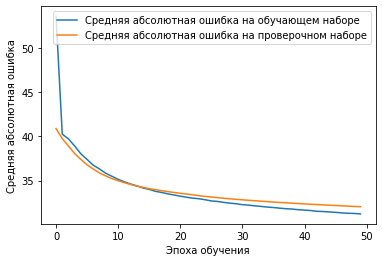

In [ ]:
# Предсказываем по предыдущей работе и желаемой
modelTProf = Sequential()
modelTProf.add(Dense(20, activation='relu', input_dim=(xTrainProf01.shape[1]) ) )
modelTProf.add(Dense(500, activation='relu'))
modelTProf.add(Dense(1, activation='linear'))

modelTProf.compile(optimizer=Adagrad(lr=1e-3), loss='mse', metrics=['mae'])

history = modelTProf.fit(xTrainProf01[:50000], 
                    yTrain[:50000], 
                    batch_size=20,
                    epochs=50, 
                    #validation_split=0.1, 
                    validation_data=(xTrainProf01[50000:], yTrain[50000:]),
                    verbose=1, shuffle=True)

plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
del xTrainProf01 # Удаляем переменную, иначе дальше может вылететь из-за нехватки памяти

##Загружаем сложные текстовые данные

*Разбор данного раздела:* https://youtu.be/h8cOCvlYmN8?t=1566

In [ ]:
# Выкачиваем данные по резюме
def getXTrainTRez(values):
  xTrainTRez = []
  
  for val in values:
    currText = ""
    if (type(val[6]) != float):
      currText += val[6]
    
    if (getParameterSalary(val[1]) != -1):
      xTrainTRez.append(currText)
  
  xTrainTRez = np.array(xTrainTRez)
  
  return xTrainTRez

In [ ]:
# Вытаскиваем резюме для выборки
xTrainTRez = getXTrainTRez(fixed_df.values)

In [ ]:
print(xTrainTRez[10]) # Пример профессии 11го резюме

Опыт работы 27 лет 4 месяца  Программист 2 000 EUR Информационные технологии, интернет, телеком Программирование, Разработка Системная интеграция Занятость: полная занятость График работы: полный день Опыт работы 27 лет 4 месяца Январь 2008 — по настоящее время 11 лет 4 месяца Консалтинг КАС Главный аналитик Программирование на разных версиях RPG для AS/400 (iSeries). Модификация и доработка существующего кода, расширения функциональности системы. Разработка новых модулей и подсистем. Постановка задач, управление проектами. Январь 1993 — Январь  2008 15 лет 1 месяц Артекс, крупнейший дилер БМВ в Москве Директор по ИТ Доработка существующей системы управления дилерским предприятием (AS/400, iSeries). Все версии RPG (RPG36, RPG400, ILE RPG). Работа с DB2. Расширение функциональности системы, изменение системы, согласно действующему законодательству РФ. Руководство проектами, координация действий различных подразделений компании и сторонних организаций. Бюджетирование. Исследование бизнес

In [ ]:
#################
#Преобразовываем текстовые данные в числовые/векторные для обучения нейросетью
#################

maxWordsCount = 5000 #определяем макс.кол-во слов/индексов, учитываемое при обучении текстов

#для этого воспользуемся встроенной в Keras функцией Tokenizer для разбиения текста и превращения в матрицу числовых значений
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
#выше задаем параметры:
#(num_words=maxWordsCount) - определяем макс.кол-во слов/индексов, учитываемое при обучении текстов
#(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n') - избавляемся от ненужных символов
#(lower=True) - приводим слова к нижнему регистру
#(split=' ') - разделяем слова по пробелу
#(char_level=False) - просим токенайзер не удалять однобуквенные слова

tokenizer.fit_on_texts(xTrainTRez)         # "скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности
items = list(tokenizer.word_index.items()) # Вытаскиваем индексы слов для просмотра

In [ ]:
# Преобразовываем текст в последовательность индексов согласно частотному словарю
xTrainRezIndexes = tokenizer.texts_to_sequences(xTrainTRez) # Обучающие тесты в индексы

## Создание обучающей и проверочной выборки

Функции для формирования выборки по отрезкам текста с заданным шагом

Подготовка данных

In [ ]:
xTrainRez01 = tokenizer.sequences_to_matrix(xTrainRezIndexes) # Подаем xTrain в виде списка чтобы метод успешно сработал
print(xTrainRez01.shape)                                      # Размер обучающей выборки, сформированной по Bag of Words
print(xTrainRez01[0][0:100])    

(62967, 5000)
[0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0.]


In [ ]:
print(xTrainRez01.shape) # Размер выборки самых частых слов
print(xTrainRez01[555]) # Пример из отформатированной выборки

(62967, 5000)
[0. 0. 1. ... 0. 0. 0.]


##Обучаем нейронку на сложных текстовых данных

*Разбор данного раздела:* https://youtu.be/h8cOCvlYmN8?t=1616


Epoch 1/20
2500/2500 [==============================] - 5s 2ms/step - loss: 15660.3145 - mae: 27.4569 - val_loss: 1513.4458 - val_mae: 24.8467
Epoch 2/20
2500/2500 [==============================] - 5s 2ms/step - loss: 14903.1260 - mae: 23.8727 - val_loss: 1540.6873 - val_mae: 25.7508
Epoch 3/20
2500/2500 [==============================] - 5s 2ms/step - loss: 14090.9912 - mae: 22.9985 - val_loss: 1428.7754 - val_mae: 23.5003
Epoch 4/20
2500/2500 [==============================] - 6s 2ms/step - loss: 13188.4990 - mae: 21.2798 - val_loss: 1505.1117 - val_mae: 23.7810
Epoch 5/20
2500/2500 [==============================] - 5s 2ms/step - loss: 11952.0039 - mae: 19.8930 - val_loss: 1428.9722 - val_mae: 23.5358
Epoch 6/20
2500/2500 [==============================] - 5s 2ms/step - loss: 10167.0332 - mae: 18.7258 - val_loss: 2941.7305 - val_mae: 31.4668
Epoch 7/20
2500/2500 [==============================] - 5s 2ms/step - loss: 9631.6514 - mae: 18.8640 - val_loss: 1475.1525 - val_mae: 23.7413


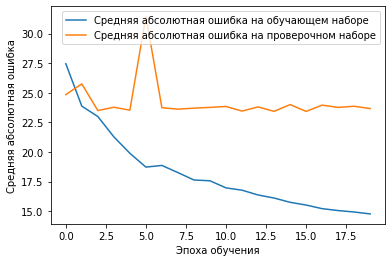

In [ ]:
# здесь в параметрах maxWordCount = 2000
modelTRez = Sequential()
modelTRez.add(Dense(20, activation='relu',input_dim=(xTrainRez01.shape[1])))
modelTRez.add(Dense(500, activation='relu'))
modelTRez.add(Dropout(0.3))
modelTRez.add(Dense(1, activation='linear'))
 
modelTRez.compile(optimizer=Adam(lr=1e-3), loss='mse', metrics=['mae'])
 
history = modelTRez.fit(xTrainRez01[:50000], 
                    yTrain[:50000], 
                    batch_size=20,
                    epochs=20, 
                    validation_data=(xTrainRez01[50000:], yTrain[50000:]),
                    verbose=1, shuffle=True)
 
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

##Составная нейронка

*Разбор данного раздела:* https://youtu.be/h8cOCvlYmN8?t=1652

In [ ]:
input1 = Input((xTrain01.shape[1],))
#input2 = Input((xTrainProf01.shape[1],))
input3 = Input((xTrainRez01.shape[1],))

x1 = BatchNormalization()(input1) # Создаем ветку х1
x1 = Dropout(0.5)(x1)
x1 = Dense(10, activation="relu")(x1)
x1 = Dense(1000, activation="relu")(x1)
x1 = Dense(100, activation = "relu")(x1)

#x2 = BatchNormalization()(input2) # Создаем ветку х2
#x2 = Dense(25, activation="relu")(input2)
#x2 = Dense(8, activation="tanh")(x2)
#x2 = Dense(5, activation = "elu")(x2)

#x3 = BatchNormalization()(input3) # Создаем ветку х3
x3 = Dense(1000, activation="tanh")(input3)
x3 = Dense(20, activation = "elu")(x3)
x3 = Dense(5, activation = "elu")(x3)

x = concatenate([x1, x3]) # Объединяем все три ветки

x = Dense(15, activation='linear')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='relu')(x) # Финальный нейрон, делает регрессию

model = Model((input1, input3), x) # В Model загружаем стартовые и последнюю точки 

model.compile(optimizer=Adam(lr=1e-3), loss='mse', metrics=['mae'])

history = model.fit([xTrain01[:50000], xTrainRez01[:50000]], 
                    yTrain[:50000], 
                    epochs= 80, 
                    validation_data=([xTrain01[50000:], xTrainRez01[50000:]], 
                    yTrain[50000:]), 
                    verbose=1, shuffle=True)

Epoch 1/80
1563/1563 [==============================] - 6s 4ms/step - loss: 16225.0801 - mae: 31.1377 - val_loss: 1442.7241 - val_mae: 23.0263
Epoch 2/80
1563/1563 [==============================] - 5s 4ms/step - loss: 15522.8867 - mae: 27.1276 - val_loss: 1337.5441 - val_mae: 21.8566
Epoch 3/80
1563/1563 [==============================] - 6s 4ms/step - loss: 15052.4414 - mae: 25.4680 - val_loss: 1435.2914 - val_mae: 23.0118
Epoch 4/80
1563/1563 [==============================] - 6s 4ms/step - loss: 14487.2559 - mae: 24.4120 - val_loss: 1204.0270 - val_mae: 20.7841
Epoch 5/80
1563/1563 [==============================] - 5s 3ms/step - loss: 14412.2881 - mae: 23.2311 - val_loss: 1268.8862 - val_mae: 21.1665
Epoch 6/80
1563/1563 [==============================] - 5s 3ms/step - loss: 13239.8428 - mae: 22.5278 - val_loss: 1177.0663 - val_mae: 20.3566
Epoch 7/80
1563/1563 [==============================] - 5s 3ms/step - loss: 12473.4033 - mae: 21.4978 - val_loss: 1191.4929 - val_mae: 21.2376

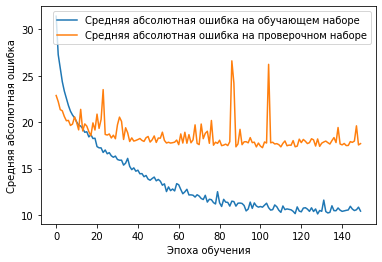

In [ ]:
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

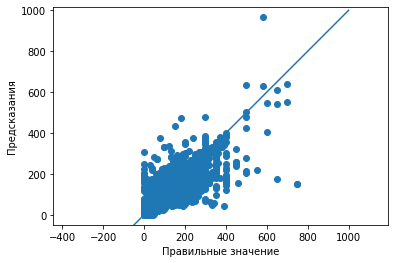

In [ ]:
yy = yTrain[50000:] # Зарплата
pred = model.predict([xTrain01[50000:], xTrainRez01[50000:]]) # Предсказанная зарплата
plt.scatter(yy, pred)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-1000, 1000], [-1000, 1000])
plt.show()

In [ ]:
del xTrainRez01, xTrainRezIndexes # Удаляем некоторые переменные, иначе дальше может вылететь из-за нехватки памяти